Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. 
The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. 
There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [1]:
#Imoporting neccecory Libraries:

#common lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#preprocessing lib:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

#outliers lib:
from scipy import stats

#multicolliniarity lib:
from sklearn.feature_selection import SelectKBest,f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

#Model building lib 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

#model evaluation lib:
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score,confusion_matrix,plot_roc_curve

#model hyper parameter tuning lib:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [54]:
#Loading the Dataset:
df=pd.read_csv('Census Income Project.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
pd.set_option('display.max_rows',None)

In [4]:
df.shape
#there is 32560 rows and 15 columns is availble in the data

(32560, 15)

In [5]:
df.info()
#here the object types are int and object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#checking null value from the dataframe
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [ ]:
#there is no null available in the features and label

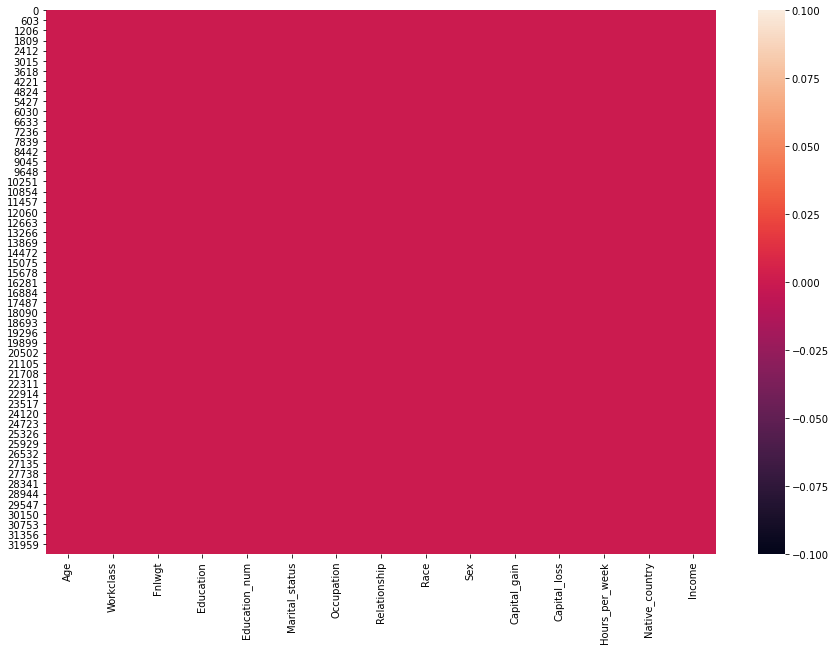

In [7]:
#there is no null value available in the dataframe.cross checking the same with the heatmap.
plt.figure(figsize=(15,10))
sns.heatmap(df.isna())
plt.show()

In [8]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [55]:
#Saving catagorial data into list for the binary encoding
dt_value=['int8','int16','int32','int64','float16','float32','float64']
cat_data=[]
feature_type=df.columns.values.tolist()


for column in feature_type:
    if df[column].dtype in dt_value:
        continue
    cat_data.append(column)        

In [56]:
cat_data

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [57]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [58]:
char_value=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
lb=LabelEncoder()

for i in char_value:
    df[i]=lb.fit_transform(df[i])

In [33]:
df['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [59]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [61]:
#performing the get_dummies to encode the data
df=pd.get_dummies(df,columns=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Native_country'])

In [62]:
df.head()

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_0,Workclass_1,...,Native_country_32,Native_country_33,Native_country_34,Native_country_35,Native_country_36,Native_country_37,Native_country_38,Native_country_39,Native_country_40,Native_country_41
0,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [63]:
df.shape
#the new shape is 32560 rows and 108 columns is availble in the data

(32560, 108)

In [39]:
#describing the dataset using describe method.
df.iloc[:,:7].describe()

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,0.669195,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,0.470510,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,1.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,1.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,1.000000,99999.000000,4356.000000,99.000000


In [ ]:
#here standerd daviation looks abnormal and means and midian(50%) looks imbalanced means there is outlires present in the features,

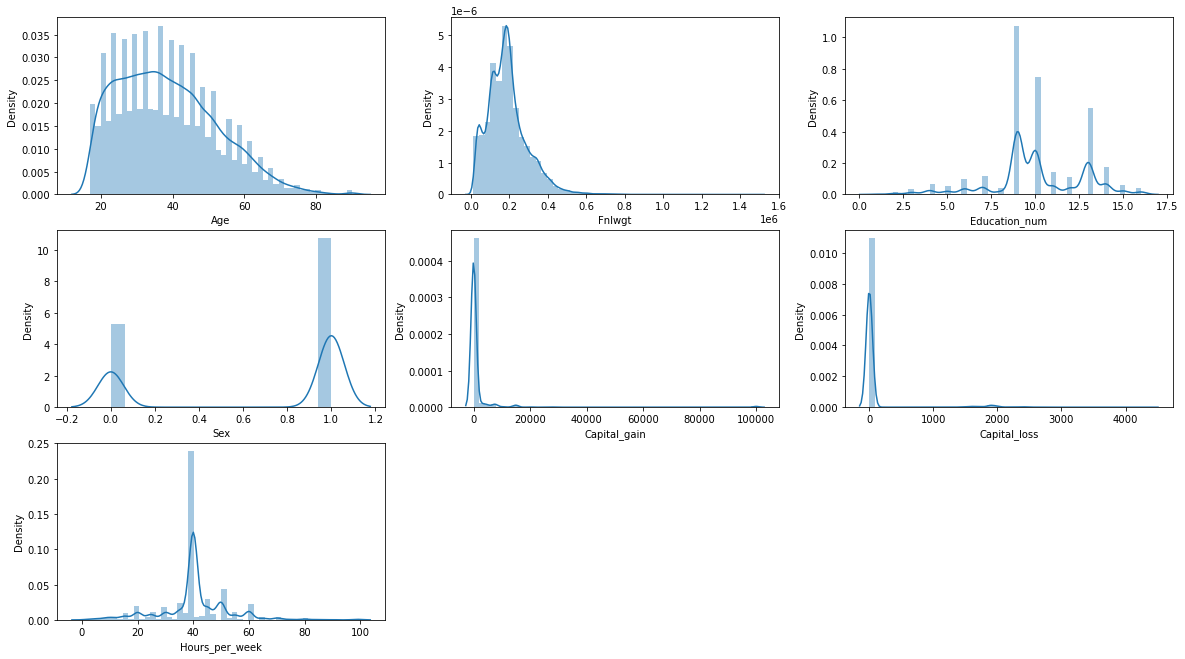

In [64]:
#ploting the distribition plot to check the data distribution
plt.figure(figsize=(20,15),facecolor='white')
pltnum=1

for column in df.iloc[:,:7]:
    if pltnum <= 30:
        plt.subplot(4,3,pltnum)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show()    

In [ ]:
#here the outliers are available in the many features.i.e. Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
#for all this features having outliers avaliable

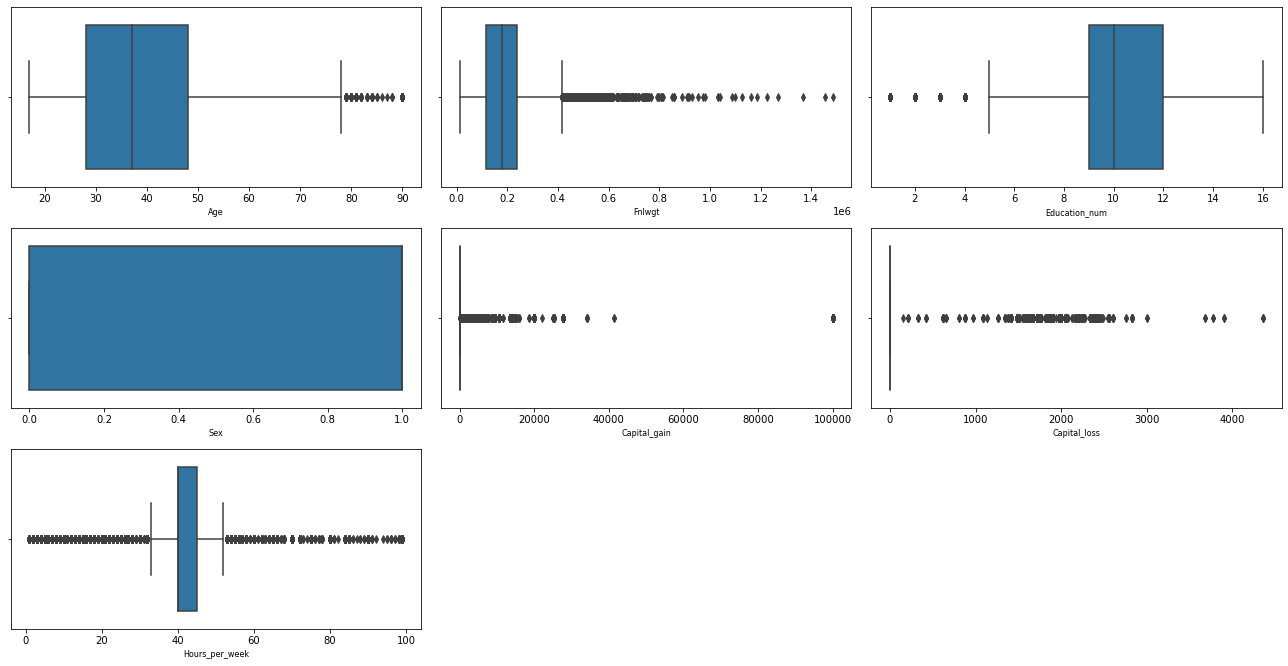

In [65]:
#Checking the Ouliars using boxplot:
plt.figure(figsize=(18,12),facecolor='white')
pltnum=1

for columns in df.iloc[:,:7]:
    if pltnum <= 16:
        plt.subplot(4,3,pltnum)
        sns.boxplot(df[columns])
        plt.xlabel(columns,fontsize=8)
        
    pltnum +=1
plt.tight_layout()    

In [ ]:
#here we can see that from boxplot the ouliers are present in max of the columns,
#i.e Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week

In [66]:
#using the IQR method to remove outliers
q1=df.iloc[:,[0,1,2,4,5,6]].quantile(0.25)

q3=df.iloc[:,[0,1,2,4,5,6]].quantile(0.75)

iqr=q3-q1

In [67]:
#checking the outliers and storing the index value
for column in df.iloc[:,[0,1,4,5,6]]:
    index=np.where(df[column] > (q3[column] + (1.5 * iqr[column])))
    
for column in df.iloc[:,[2,6]]:
    index=np.where(df[column] < (q3[column] - (1.5 * iqr[column])))    

In [68]:
index

(array([    0,     5,    11, ..., 32544, 32552, 32558], dtype=int64),)

In [69]:
#dropping the oultiers index
df=df.drop(df.index[index])

In [70]:
#checking the new shape after deleting the outlers
df.shape

(25311, 108)

In [71]:
#Data Loss
loss_percentage=(32560-25311)/32560*100
print(loss_percentage)

22.263513513513512


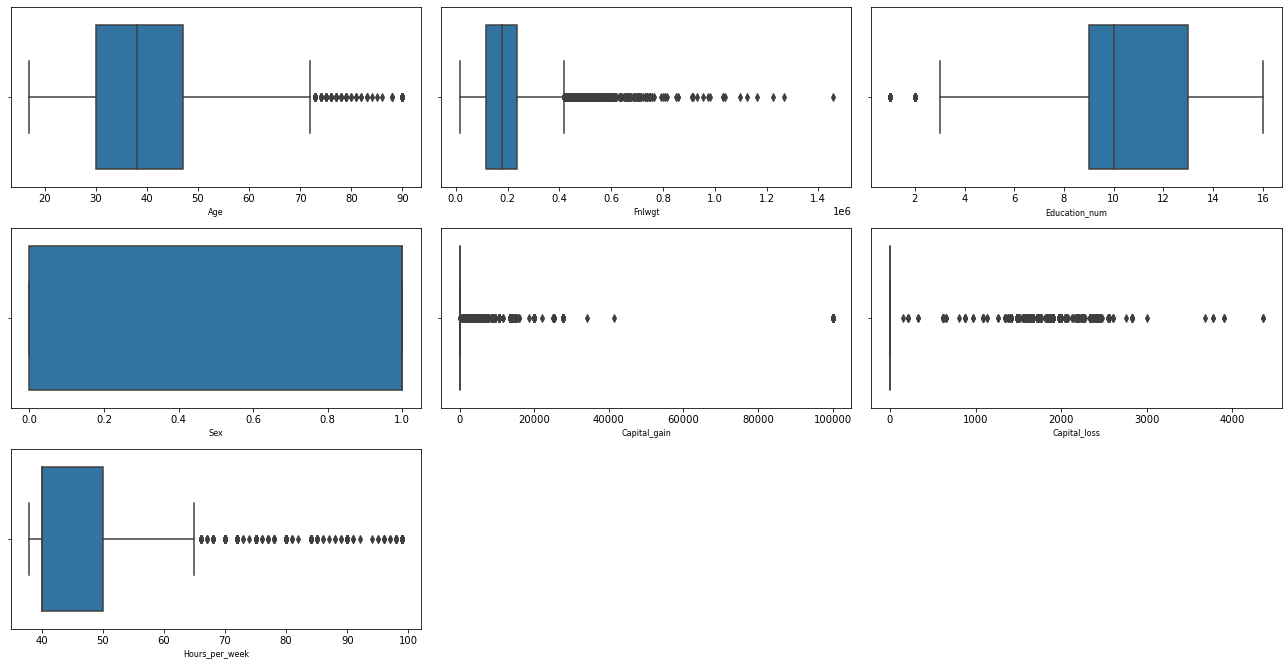

In [72]:
#Checking the Ouliars using boxplot:
plt.figure(figsize=(18,12),facecolor='white')
pltnum=1

for columns in df.iloc[:,:7]:
    if pltnum <= 16:
        plt.subplot(4,3,pltnum)
        sns.boxplot(df[columns])
        plt.xlabel(columns,fontsize=8)
        
    pltnum +=1
plt.tight_layout()    

In [ ]:
#the outlier has been removed after performing the IQR there are still some outliers are available.

In [73]:
#checking the skewness and correlation of target with features.
df_corr=df.iloc[:,:8].abs().corr()
df_corr['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.334881
Age               0.243497
Capital_gain      0.214956
Sex               0.212392
Hours_per_week    0.151466
Capital_loss      0.146476
Fnlwgt           -0.005444
Name: Income, dtype: float64

In [ ]:
#there is no skweness available as the all the features range is between -0.5 to +0.5

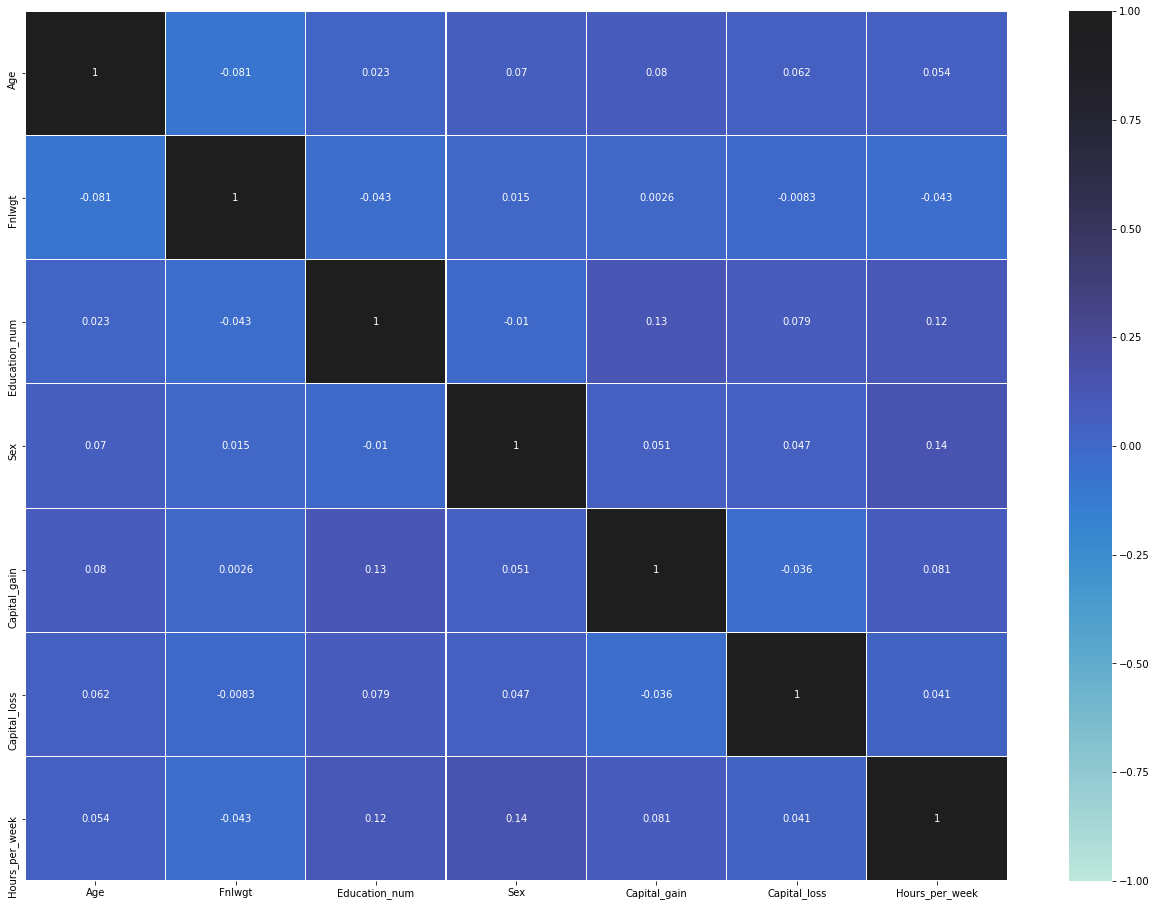

In [74]:
#using the heatmap to check the multicollinearity between features.
corr_matrix=df.iloc[:,:7].abs().corr()

plt.figure(figsize=(22,16))

sns.heatmap(corr_matrix,vmin=-1,vmax=1,center=True,annot=True, fmt='.2g',linewidths=0.1)
plt.show()

#as we can see in heatmap there is no correlation between the features and labels

In [ ]:
#there is no multicolliniarity issue looks between the features.

In [85]:
#Saving the features to perform the standerd scalar
col_name=['Age','Fnlwgt','Education_num','Sex','Capital_gain','Capital_loss','Hours_per_week']
features = df[col_name]

In [86]:
scalar=StandardScaler()
x_new=scalar.fit_transform(features.values)

In [88]:
df[['Age','Fnlwgt','Education_num','Sex','Capital_gain','Capital_loss','Hours_per_week']]=x_new

In [89]:
df.head()

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_0,Workclass_1,...,Native_country_32,Native_country_33,Native_country_34,Native_country_35,Native_country_36,Native_country_37,Native_country_38,Native_country_39,Native_country_40,Native_country_41
1,-0.096754,0.245332,-0.477479,0.615850,-0.155408,-0.228508,-0.562922,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.143551,0.426346,-1.256760,0.615850,-0.155408,-0.228508,-0.562922,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.923624,1.410303,1.081082,-1.623773,-0.155408,-0.228508,-0.562922,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.179441,0.899506,1.470722,-1.623773,-0.155408,-0.228508,-0.562922,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,1.060864,0.188356,-0.477479,0.615850,-0.155408,-0.228508,-0.000467,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [90]:
x_dt=df.iloc[:,:7]
x_dt.head()

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week
1,-0.096754,0.245332,-0.477479,0.615850,-0.155408,-0.228508,-0.562922
2,1.143551,0.426346,-1.256760,0.615850,-0.155408,-0.228508,-0.562922
3,-0.923624,1.410303,1.081082,-1.623773,-0.155408,-0.228508,-0.562922
4,-0.179441,0.899506,1.470722,-1.623773,-0.155408,-0.228508,-0.562922
6,1.060864,0.188356,-0.477479,0.615850,-0.155408,-0.228508,-0.000467


In [91]:
#performing the variance infletion factor to check multicolliniarity between features
vif=pd.DataFrame()
vif['feature name']=x_dt.columns
vif['vif score']=[variance_inflation_factor(x_new,i) for i in range(x_new.shape[1])]
vif

,feature name,vif score
0,Age,1.022772
1,Fnlwgt,1.010364
2,Education_num,1.038689
3,Sex,1.029930
4,Capital_gain,1.031196
5,Capital_loss,1.015598
6,Hours_per_week,1.044468


In [ ]:
#there is no multicolliniarty found between the features as all the vif score is below 5.

In [92]:
#seprating the x features and target from the dataset.
x=df.drop(columns='Income')
y=df['Income']

In [93]:
#Checking the upsampling and downsampling(class imbalanced problem) for the target columns
y.value_counts()

0    18115
1     7196
Name: Income, dtype: int64

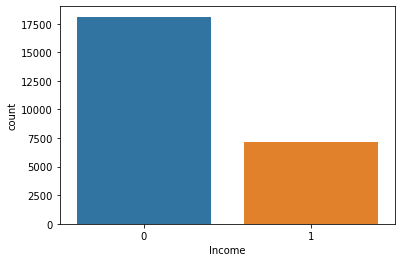

In [114]:
#Plotting the count plot to check label data
sns.countplot(x='Income',data=df)
plt.show()

In [ ]:
#here we can see the issue of class imbalanced problem as 0 has 18115 count and 1 has only 7196 count.

In [94]:
#handling class imbalanced problem by oversampling the minority class using SMOTE:
from imblearn.over_sampling import SMOTE

In [95]:
SM=SMOTE()
x_fit,y_fit=SM.fit_resample(x,y)

In [96]:
#new the issue of class imbalanced problem has been solved.
y_fit.value_counts()

1    18115
0    18115
Name: Income, dtype: int64

In [97]:
#Finding best Random State:
maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_fit,y_fit,test_size=0.25,random_state=i)
    dt=LogisticRegression()
    dt.fit(x_train,y_train)
    y_pred=dt.predict(x_test)
    acc_s=accuracy_score(y_test,y_pred)
    if acc_s > maxAcc:
        maxAcc=acc_s
        maxRs=i
        
print(f"Best Accuracy is : {maxAcc* 100:.2f}%")
print("The Best Random State is :",maxRs)

Best Accuracy is : 85.11%
The Best Random State is : 190


In [98]:
#seprating the train and test datasets with the best find random state
x_train,x_test,y_train,y_test=train_test_split(x_fit,y_fit,test_size=0.25,random_state=190)

In [99]:
#Using the DecisionTreeClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_predlr=lr.predict(x_test)

print('\n==========Outputs of Logistics Reggression===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predlr)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predlr,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predlr))


==========Outputs of Logistics Reggression===========

==========Accuracy Score===========
Accuracy Score is : 85.11%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      4498
           1       0.84      0.87      0.85      4560

    accuracy                           0.85      9058
   macro avg       0.85      0.85      0.85      9058
weighted avg       0.85      0.85      0.85      9058
 

=========Confusion Matrix============
[[3735  763]
 [ 586 3974]]


In [100]:
#Using the DecisionTreeClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_preddt=dt.predict(x_test)

print('\n==========Outputs of DT===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_preddt)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_preddt,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_preddt))


==========Outputs of DT===========

==========Accuracy Score===========
Accuracy Score is : 81.78%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      4498
           1       0.81      0.83      0.82      4560

    accuracy                           0.82      9058
   macro avg       0.82      0.82      0.82      9058
weighted avg       0.82      0.82      0.82      9058
 

=========Confusion Matrix============
[[3602  896]
 [ 754 3806]]


In [107]:
#Using the AdaBoostClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
y_predabc=abc.predict(x_test)

print('\n==========Outputs of ADA Boost===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predabc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predabc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predabc))


==========Outputs of ADA Boost===========

==========Accuracy Score===========
Accuracy Score is : 83.80%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      4498
           1       0.82      0.86      0.84      4560

    accuracy                           0.84      9058
   macro avg       0.84      0.84      0.84      9058
weighted avg       0.84      0.84      0.84      9058
 

=========Confusion Matrix============
[[3651  847]
 [ 620 3940]]


In [101]:
#Using the SVC algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

svc=SVC(probability=True)
svc.fit(x_train,y_train)
y_predsvc=svc.predict(x_test)

print('\n==========Outputs of SVC===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predsvc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predsvc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predsvc))


==========Outputs of SVC===========

==========Accuracy Score===========
Accuracy Score is : 85.71%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      4498
           1       0.83      0.91      0.86      4560

    accuracy                           0.86      9058
   macro avg       0.86      0.86      0.86      9058
weighted avg       0.86      0.86      0.86      9058
 

=========Confusion Matrix============
[[3624  874]
 [ 420 4140]]


In [102]:
#Using the RandomForestClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_predrfc=rfc.predict(x_test)

print('\n==========Outputs of Random Forest Classifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predrfc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predrfc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predrfc))


==========Outputs of Random Forest Classifier===========

==========Accuracy Score===========
Accuracy Score is : 87.47%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      4498
           1       0.86      0.90      0.88      4560

    accuracy                           0.87      9058
   macro avg       0.88      0.87      0.87      9058
weighted avg       0.88      0.87      0.87      9058
 

=========Confusion Matrix============
[[3826  672]
 [ 463 4097]]


In [103]:
#Using the KNeighborsClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_predknn=knn.predict(x_test)

print('\n==========Outputs of KNeighborsClassifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predknn)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predknn,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predknn))


==========Outputs of KNeighborsClassifier===========

==========Accuracy Score===========
Accuracy Score is : 83.79%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      4498
           1       0.79      0.92      0.85      4560

    accuracy                           0.84      9058
   macro avg       0.85      0.84      0.84      9058
weighted avg       0.85      0.84      0.84      9058
 

=========Confusion Matrix============
[[3405 1093]
 [ 375 4185]]


In [105]:
#Now checking the Overfitting of the all the models using cross_val_score.
from sklearn.model_selection import cross_val_score

In [126]:
print('\n==========Cross Validation Score of Logistices Classifier===========')
cvs_lr=cross_val_score(lr,x_fit,y_fit,cv=5)
print(f"Cross validation for the Logistices Classifier is: {cvs_lr.mean()*100:.2f}%\n")

print('\n==========Cross Validation Score of Random Forest Classifier===========')
cvs_rfc=cross_val_score(rfc,x_fit,y_fit,cv=5)
print(f"Cross validation for the Random Forest Classifier is: {cvs_rfc.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of Decision Tree====================')
cvs_dt=cross_val_score(dt,x_fit,y_fit,cv=5)
print(f"Cross validation for the Decision Tree is: {cvs_dt.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of AdaBoost Classifier==============')
cvs_abc=cross_val_score(abc,x_fit,y_fit,cv=5)
print(f"Cross validation for the AdaBoost Classifier is: {cvs_abc.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of KNN========================')
cvs_knn=cross_val_score(knn,x_fit,y_fit,cv=5)
print(f"Cross validation for the KNN Classifier is: {cvs_knn.mean()*100:.2f}%\n")



==========Cross Validation Score of Logistices Classifier===========
Cross validation for the Logistices Classifier is: 83.87%


==========Cross Validation Score of Random Forest Classifier===========
Cross validation for the Random Forest Classifier is: 87.19%


=============Cross Validation Score of Decision Tree====================
Cross validation for the Decision Tree is: 81.91%


=============Cross Validation Score of AdaBoost Classifier==============
Cross validation for the AdaBoost Classifier is: 82.77%


===================Cross Validation Score of KNN========================
Cross validation for the KNN Classifier is: 83.88%



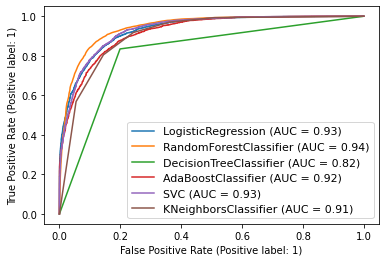

In [111]:
#using the roc_auc_curve 
dist=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=dist.ax_)#abc svc, 
plot_roc_curve(dt,x_test,y_test,ax=dist.ax_)
plot_roc_curve(abc,x_test,y_test,ax=dist.ax_)
plot_roc_curve(svc,x_test,y_test,ax=dist.ax_)
plot_roc_curve(knn,x_test,y_test,ax=dist.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [ ]:
#we select the Random Forest Regressor after comaparing all the models accuracy with the cross validation score.
#LR: Accuracy:85.11   cross validation score:83.87  Diffrence:1.24
#DT: Accuracy:81.78   cross validation score:81.91  Diffrence:-0.13
#ADA: Accuracy:83.80   cross validation score:82.77  Diffrence:1.03
#RFC: Accuracy:87.47   cross validation score:87.31  Diffrence:0.16
#KNN: Accuracy:83.79   cross validation score:83.88  Diffrence:-0.09

#As we can see the Random Forest Regressor has highest accuracy and least differnece so we can select it for hyper parameter tuing.

In [118]:
#Now Appling the gridsearchcv beofore building the model to check the best parameter.
best_param={'n_estimators':[80,90,100],
           'criterion':['gini','entropy'],
           'max_depth':[10,12,15],
           'min_samples_split':[2,3,5],
           'min_samples_leaf':[2,4,6]}

In [119]:
gridcv=GridSearchCV(rfc,param_grid=best_param)

In [120]:
gridcv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [80, 90, 100]})

In [121]:
gridcv.best_params_ 

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 90}

In [124]:
#Using the RandomForestClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix after hyper paramter tuing:
 
rfc=RandomForestClassifier(criterion='entropy',max_depth=15,min_samples_leaf=3,min_samples_split=3,n_estimators=90)
rfc.fit(x_train,y_train)
y_predrfc=rfc.predict(x_test)

print('\n==========Outputs of Random Forest Classifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predrfc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predrfc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predrfc))


==========Outputs of Random Forest Classifier===========

==========Accuracy Score===========
Accuracy Score is : 84.18%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      4498
           1       0.81      0.90      0.85      4560

    accuracy                           0.84      9058
   macro avg       0.85      0.84      0.84      9058
weighted avg       0.85      0.84      0.84      9058
 

=========Confusion Matrix============
[[3512  986]
 [ 447 4113]]


In [ ]:
#the Hyper tuing has reduced the accurcy so use randomforest without hyper parameter tuning.

In [125]:
#Using the RandomForestClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_predrfc=rfc.predict(x_test)

print('\n==========Outputs of Random Forest Classifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predrfc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predrfc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predrfc))


==========Outputs of Random Forest Classifier===========

==========Accuracy Score===========
Accuracy Score is : 87.60%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      4498
           1       0.86      0.90      0.88      4560

    accuracy                           0.88      9058
   macro avg       0.88      0.88      0.88      9058
weighted avg       0.88      0.88      0.88      9058
 

=========Confusion Matrix============
[[3825  673]
 [ 450 4110]]


In [ ]:
#Saving the random forerst claasifier as the final model.

In [128]:
#Saving the model
import joblib
joblib.dump(rfc,'Census_Income_Model.pkl')

['Census_Income_Model.pkl']

In [ ]:
#This will complete the model building.